# Lab: Ballistocardiograph
### 10.26.18   |   Jonathan Kelley   |  ISIM

In this lab, we will be using a series of amplifiers and filters to capture the perceived change in weight of the body due to heart muscle contractions. Our amplifier will be an AD623 and our filters will be a series of RC and CR combinations. 

We used the diagrams in Figures 1, 2, and 3 to construct our cirucit.

![Figure 1: Instrumentation Amplifier for Strain Gauges](circuit1.png)

![Figure 2: Bandpass with cutoff frequencies of 0.5 and 16 Hz and a gain of 33](circuit2.png)

![Figure 3: Sallen-Key second order low-pass filter with a cutoff frequency of 3.2 Hz](circuit3.png)


Our final constructed circuit can be found in Figure 4.

![Figure 4: Ballistocardiograph final circuit](bcgcircuit.jpg)

We can see the two sets of amplifiers and filters to boost the heartrate signal and cut down on electrical noise.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Text(0.5,1,'Raw pressure data')

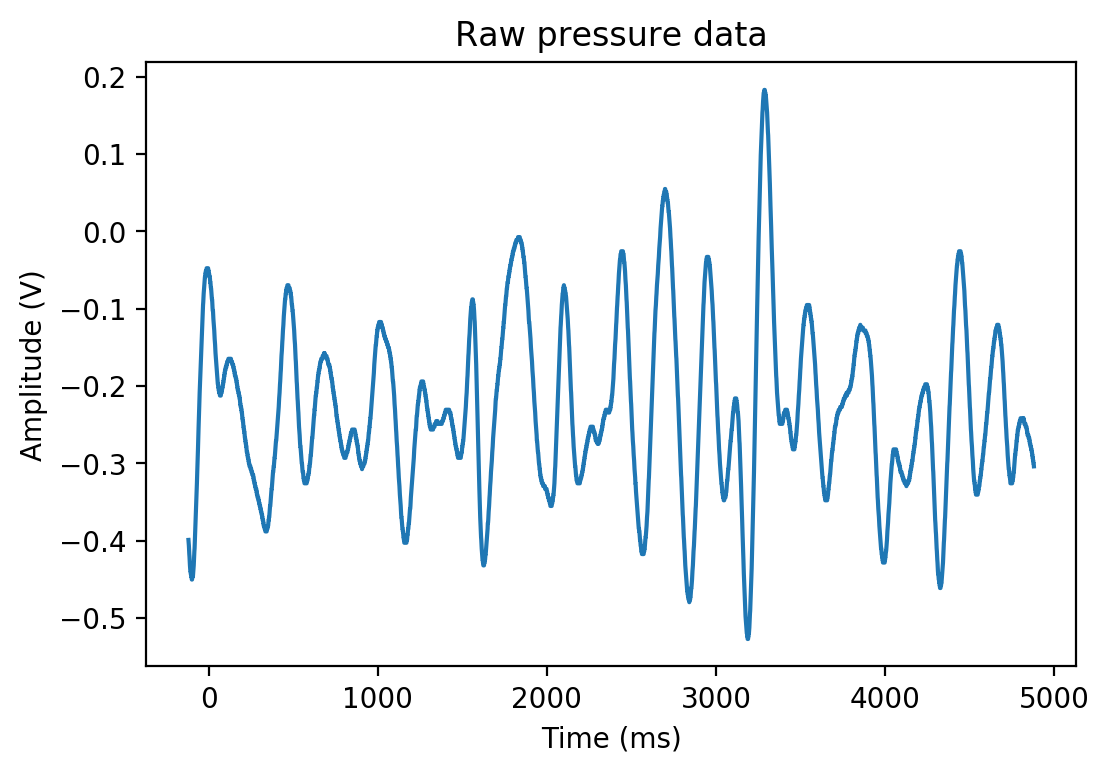

In [14]:
pressure = pd.read_csv("pulse.csv", skiprows = 8)
plt.figure(dpi = 200)
readto = 4000
plt.plot(((5+pressure['Time (s)'])*1000)[:readto], pressure['Channel 1 (V)'][:readto])
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (V)")
plt.title("Raw pressure data")

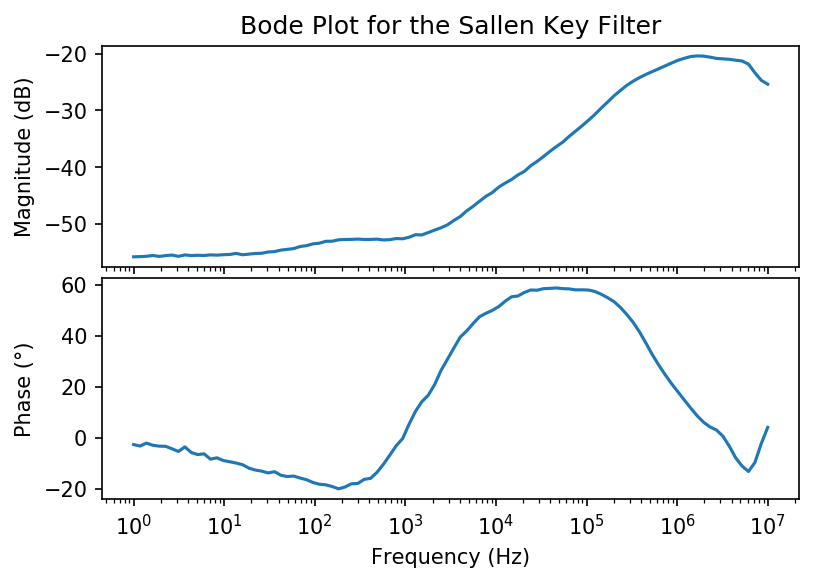

In [18]:
bode_plot("SallenKeyBode.csv", "Bode Plot for the Sallen Key Filter")

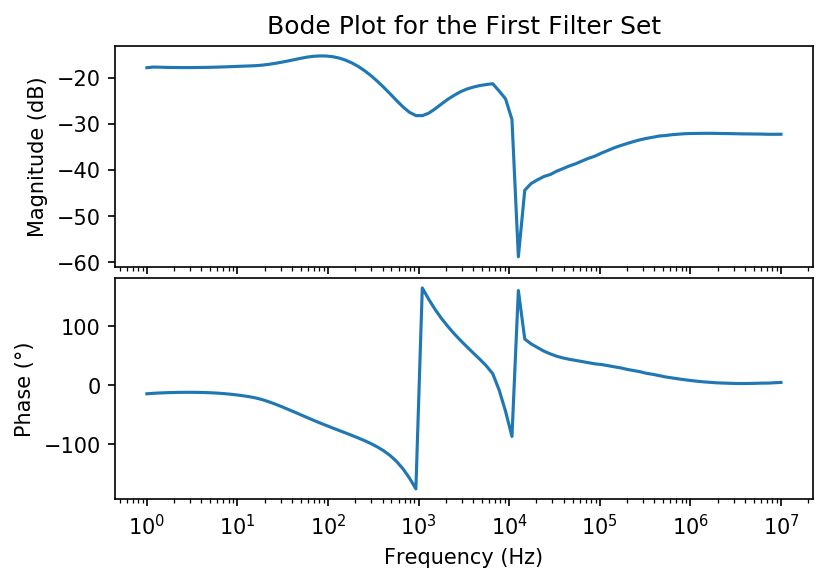

In [20]:
bode_plot("firstfilter.csv", "Bode Plot for the First Filter Set")

In [15]:
def bode_plot(file_name, title = "Bode Plot"):
    data = pd.read_csv(file_name, skiprows = 20)
    w = data['Frequency (Hz)']
    magnitude = data['Channel 2 Magnitude (dB)']
    phase = data['Channel 2 Phase (°)']
    
    fig = plt.figure(dpi = 150)
    ax1 = plt.subplot(211)
    plt.semilogx(w, magnitude)    # Bode magnitude plot
    plt.title(title)
    plt.ylabel("Magnitude (dB)")
    
    ax2 = plt.subplot(212)
    plt.semilogx(w, phase)  # Bode phase plot
    plt.ylabel("Phase (°)")    
    plt.subplots_adjust(wspace=0, hspace=.05)
    plt.xlabel("Frequency (Hz)")
    plt.show()
